In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import chi2_contingency
from IPython.display import display, HTML

In [4]:

df_freMTPL = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/data/french_data.csv")
df_beMTPL = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/data/belgium_data.csv")
df_euMTPL = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/data/european_data.csv")

In [5]:
# Étape 1 : Ajouter une colonne d'identification
df_freMTPL['Country'] = 'French'
df_beMTPL['Country'] = 'Belgium'
df_euMTPL['Country'] = 'European'


In [6]:
df_euMTPL

,Exposure,Power,DriverAge,Fuel_type,Density,Sex,Sinistre,Country
0,0.487671,14,77,0,250.0,1,0,European
1,0.019178,12,40,0,429.0,1,0,European
2,0.032877,14,75,0,86.0,1,0,European
3,0.043836,13,48,0,429.0,1,0,European
4,0.046575,12,54,0,429.0,0,0,European
...,...,...,...,...,...,...,...,...
2373192,0.246575,14,40,0,784.0,0,0,European
2373193,0.756164,14,52,0,296.0,1,0,European
2373194,0.008219,1,46,0,296.0,0,0,European
2373195,0.723288,15,25,0,296.0,1,0,European


In [7]:
data = pd.concat([df_freMTPL, df_euMTPL, df_beMTPL], ignore_index=True)
data

,Exposure,Power,DriverAge,Fuel_type,Density,Sex,Sinistre,Country
0,0.09,43,46,1,76.0,0,0,French
1,0.84,43,46,1,76.0,1,0,French
2,0.52,40,38,0,3003.0,1,0,French
3,0.45,40,38,0,3003.0,1,0,French
4,0.15,43,41,1,60.0,0,0,French
...,...,...,...,...,...,...,...,...
3627586,1.00,40,37,1,259.0,1,0,Belgium
3627587,1.00,55,44,1,259.0,1,0,Belgium
3627588,1.00,40,50,1,259.0,1,0,Belgium
3627589,1.00,66,43,0,259.0,1,0,Belgium


/tmp/ipykernel_1953/1926355341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["cyan", "red"])


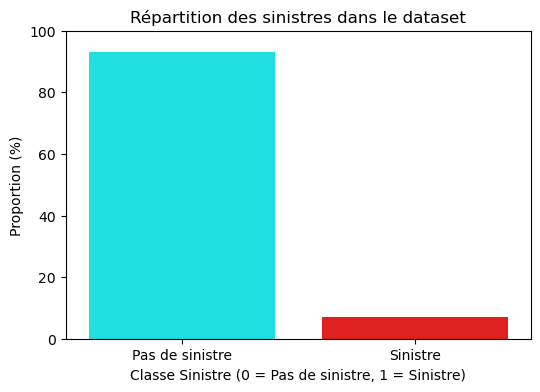

In [8]:
# Calcul de la proportion des sinistres
class_distribution = data["Sinistre"].value_counts(normalize=True) * 100

# Visualisation avec un graphique
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["cyan", "red"])
plt.xlabel("Classe Sinistre (0 = Pas de sinistre, 1 = Sinistre)")
plt.ylabel("Proportion (%)")
plt.title("Répartition des sinistres dans le dataset")
plt.xticks([0, 1], ["Pas de sinistre", "Sinistre"])
plt.ylim(0, 100)
plt.show()


In [9]:
# Style plus joli pour les plots
sns.set(style='whitegrid')


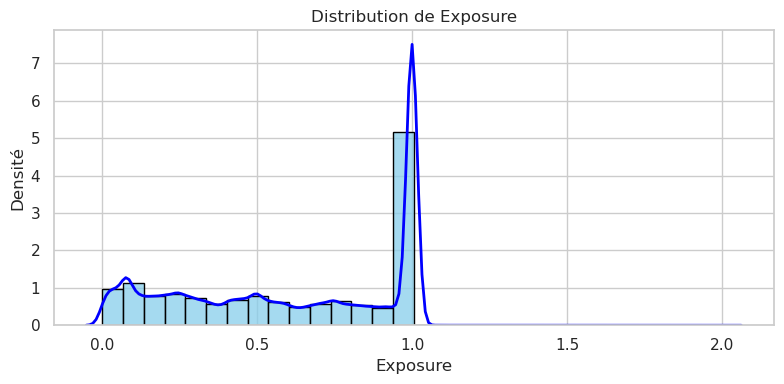

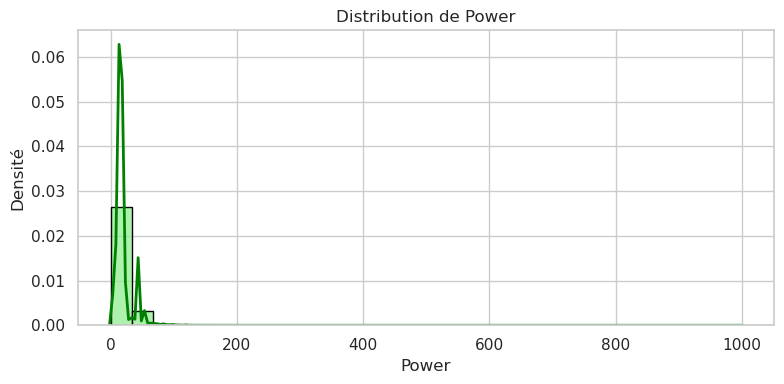

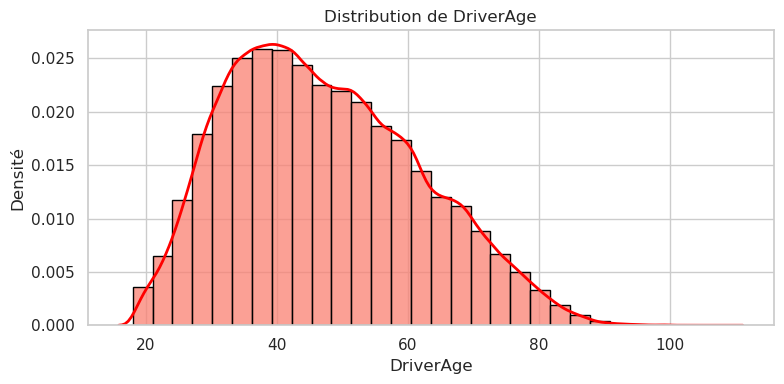

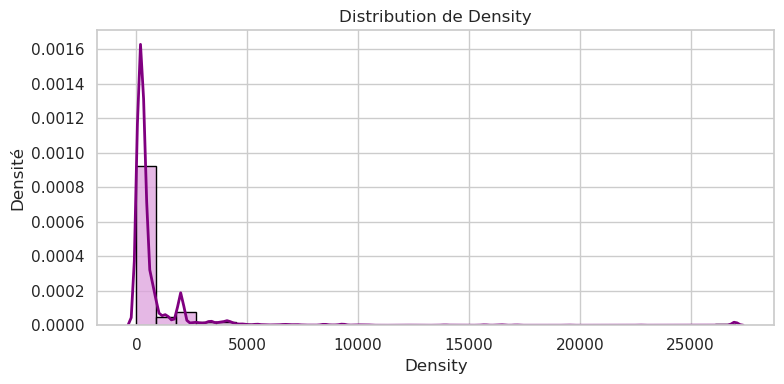

In [10]:
# Exemple de couleurs pour chaque variable
hist_colors = ['skyblue', 'lightgreen', 'salmon', 'plum']
kde_colors = ['blue', 'green', 'red', 'purple']

numerical_vars = ['Exposure', 'Power', 'DriverAge', 'Density']

for i, var in enumerate(numerical_vars):
    plt.figure(figsize=(8, 4))
    
    # Histogramme sans la courbe KDE
    sns.histplot(data[var], bins=30, color=hist_colors[i], stat="density", edgecolor="black", kde=False)
    
    # Ajout de la courbe KDE avec une couleur différente
    sns.kdeplot(data[var], color=kde_colors[i], linewidth=2)
    
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel("Densité")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_1953/3569974643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palettes[i])


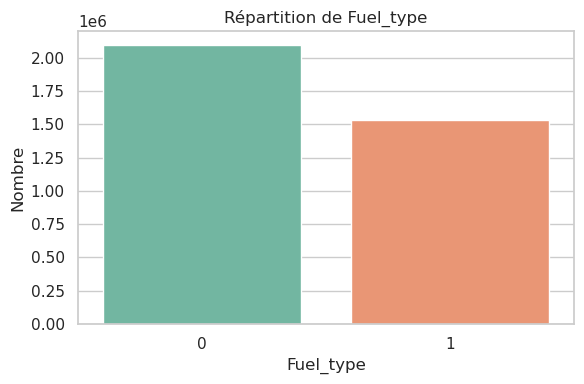

/tmp/ipykernel_1953/3569974643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palettes[i])


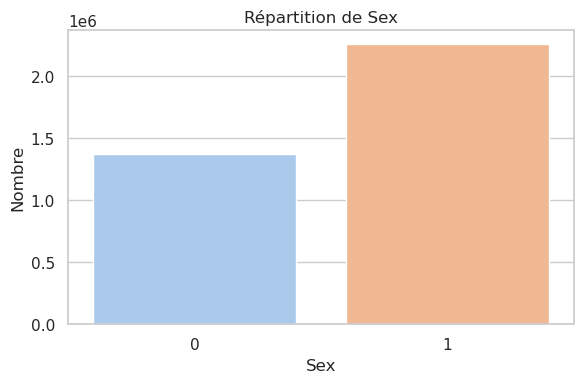

/tmp/ipykernel_1953/3569974643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palettes[i])


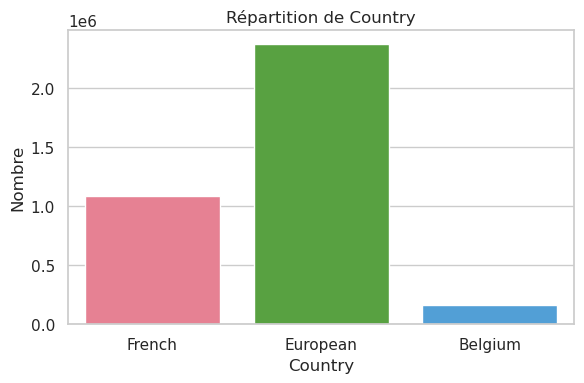

In [11]:
categorical_vars = ['Fuel_type', 'Sex', 'Country']

# Quelques palettes différentes de Seaborn
palettes = ['Set2', 'pastel', 'husl', 'muted']

for i, var in enumerate(categorical_vars):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, data=data, palette=palettes[i])
    plt.title(f'Répartition de {var}')
    plt.xlabel(var)
    plt.ylabel("Nombre")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_1953/3092530091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=var, data=data, palette=palettes[i])


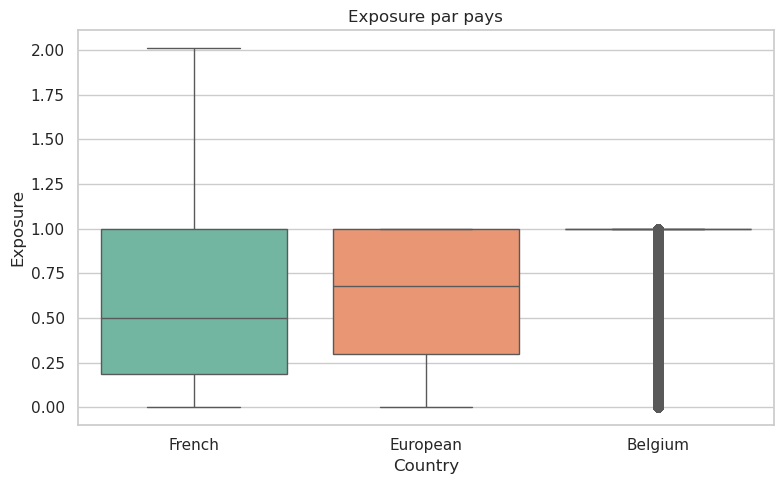

/tmp/ipykernel_1953/3092530091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=var, data=data, palette=palettes[i])


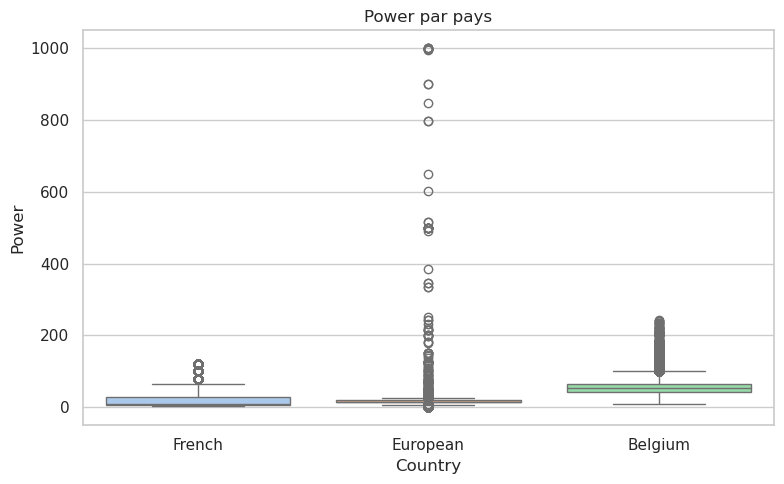

/tmp/ipykernel_1953/3092530091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=var, data=data, palette=palettes[i])


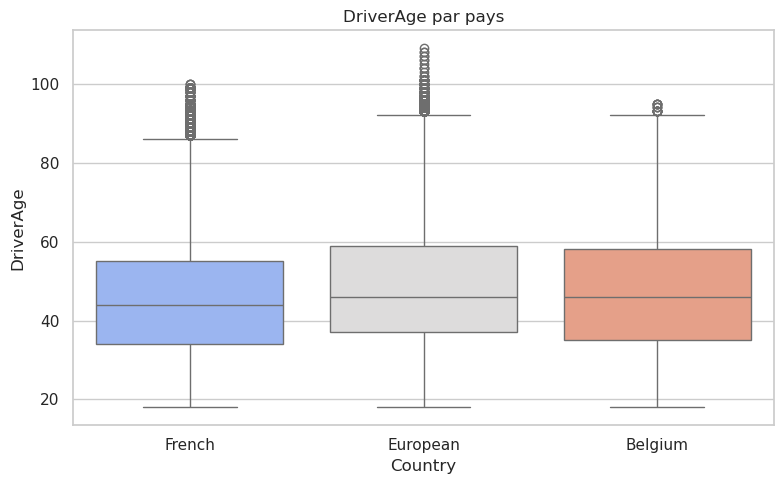

/tmp/ipykernel_1953/3092530091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=var, data=data, palette=palettes[i])


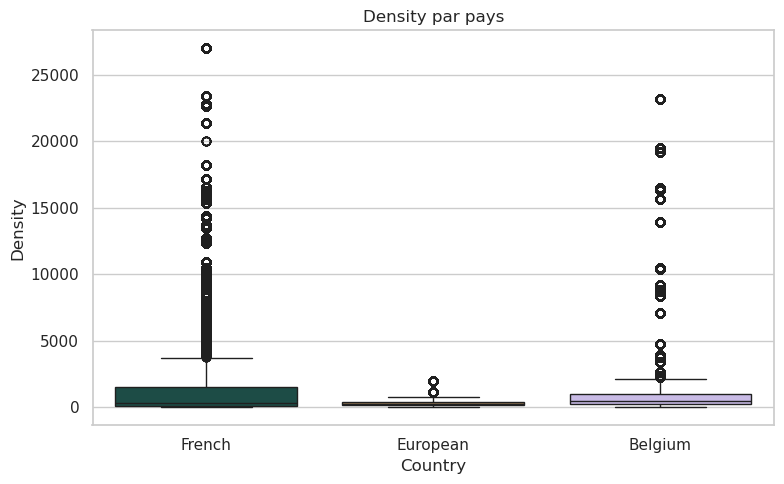

In [12]:
numerical_vars = ['Exposure', 'Power', 'DriverAge', 'Density']
# Quelques palettes différentes de Seaborn
palettes = ['Set2', 'pastel', 'coolwarm', 'cubehelix']

for i, var in enumerate(numerical_vars):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=var, data=data, palette=palettes[i])
    plt.title(f'{var} par pays')
    plt.tight_layout()
    plt.show()  # Affiche le graphique


/tmp/ipykernel_1953/3979781532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Sinistre', data=data, estimator='mean', palette=palettes[i])


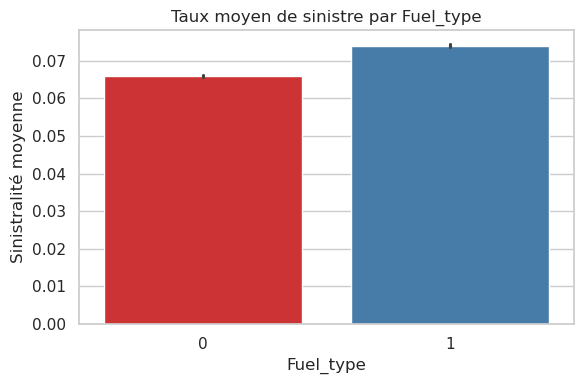

/tmp/ipykernel_1953/3979781532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Sinistre', data=data, estimator='mean', palette=palettes[i])


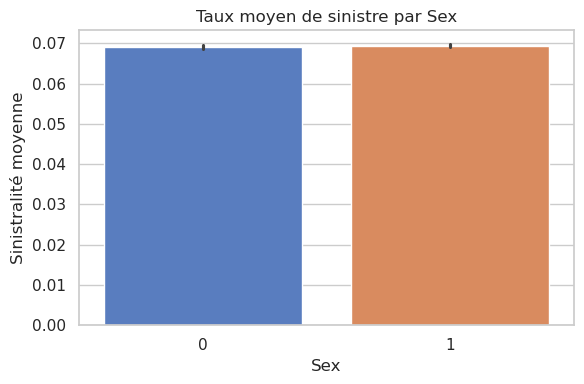

/tmp/ipykernel_1953/3979781532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Sinistre', data=data, estimator='mean', palette=palettes[i])


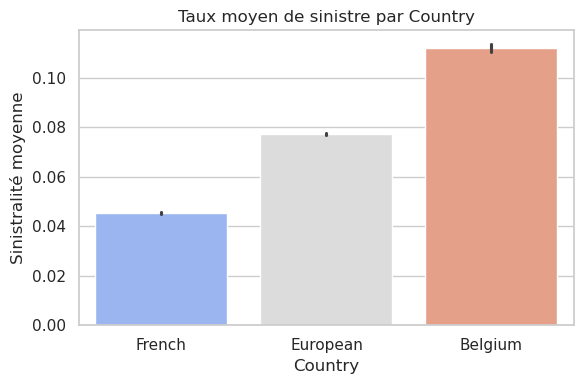

In [13]:
categorical_vars = ['Fuel_type', 'Sex', 'Country']

# Quelques palettes différentes de Seaborn
palettes = ['Set1', 'muted', 'coolwarm']

for i, var in enumerate(categorical_vars):
    plt.figure(figsize=(6, 4))
    sns.barplot(x=var, y='Sinistre', data=data, estimator='mean', palette=palettes[i])
    plt.title(f"Taux moyen de sinistre par {var}")
    plt.ylabel("Sinistralité moyenne")
    plt.tight_layout()
    plt.show()  # Affiche le graphique


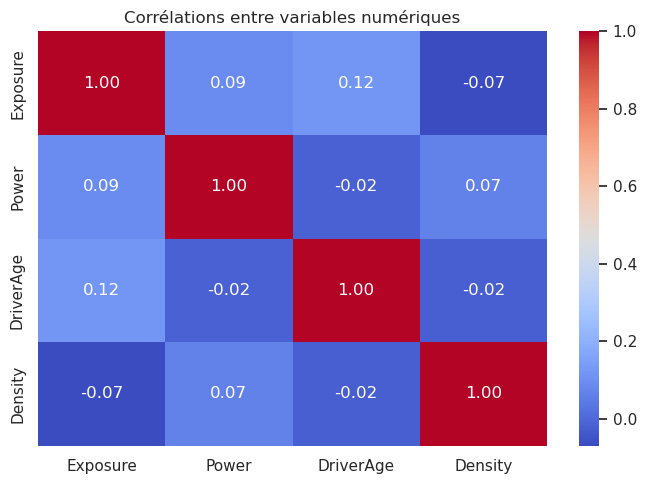

In [16]:
# Liste des variables numériques
numerical_vars = ['Exposure', 'Power', 'DriverAge', 'Density']

# Calcul de la matrice de corrélation pour ces variables spécifiées
corr_matrix = data[numerical_vars].corr()

# Affichage du heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre variables numériques")
plt.tight_layout()
plt.show()  # Affiche le graphique


In [15]:
def analyze_categorical_correlation(data, cat_vars=['Fuel_type','Sinistre', 'Sex'], 
                                   alpha=0.05, figsize=(10, 8)):
   
    # Préparation des données
    cat_df = data[cat_vars].copy()
    for col in cat_df.select_dtypes(include='bool'):
        cat_df[col] = cat_df[col].astype(str)
    
    # Calcul des résultats
    results = []
    for i, var1 in enumerate(cat_vars[:-1]):
        for var2 in cat_vars[i+1:]:
            contingency_table = pd.crosstab(cat_df[var1], cat_df[var2])
            chi2, p, dof, _ = chi2_contingency(contingency_table)
            
            # Calcul du Cramer's V
            n = contingency_table.sum().sum()
            cramer_v = np.sqrt(chi2 / (n * min(contingency_table.shape[0]-1, contingency_table.shape[1]-1)))
            
            # Interprétation
            strength = "Très forte" if cramer_v >= 0.5 else \
                     "Forte" if cramer_v >= 0.3 else \
                     "Modérée" if cramer_v >= 0.1 else "Faible"
            
            results.append({
                'Paire de variables': f"{var1} - {var2}",
                'Cramer\'s V': cramer_v,
                'Force de la corrélation': strength,
                'p-value': p,
                'Significatif': p < alpha
            })
    
    # Création du DataFrame de résultats
    results_df = pd.DataFrame(results)
    
    # Style pour la visualisation
    def color_strength(val):
        color = 'white'
        if val == "Très forte": color = '#FF0000'  # Rouge
        elif val == "Forte": color = '#FF6666'     # Rouge clair
        elif val == "Modérée": color = '#FFCCCC'   # Rouge très clair
        return f'background-color: {color}'
    
    def color_pvalue(val):
        color = 'limegreen' if val < alpha else 'lightcoral'
        return f'color: {color}; font-weight: bold'
    
    # Application du style
    styled_df = results_df.style \
        .applymap(color_pvalue, subset=['p-value']) \
        .applymap(lambda x: 'background-color: limegreen' if x else 'background-color: lightcoral', 
                 subset=['Significatif']) \
        .applymap(color_strength, subset=['Force de la corrélation']) \
        .format({
            'Cramer\'s V': "{:.3f}",
            'p-value': "{:.4f}"
        }) \
        .set_caption("Résultats des tests de corrélation entre variables catégorielles") \
        .set_properties(**{
            'text-align': 'center',
            'font-size': '12pt',
            'border': '1px solid black'
        })
    
    # Affichage dans Jupyter
    display(styled_df)
    return results_df

results = analyze_categorical_correlation(df_freMTPL)

/tmp/ipykernel_1953/604456405.py:50: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_pvalue, subset=['p-value']) \
/tmp/ipykernel_1953/604456405.py:51: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: 'background-color: limegreen' if x else 'background-color: lightcoral',
/tmp/ipykernel_1953/604456405.py:53: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_strength, subset=['Force de la corrélation']) \


,Paire de variables,Cramer's V,Force de la corrélation,p-value,Significatif
0,Fuel_type - Sinistre,0.006,Faible,0.0000,True
1,Fuel_type - Sex,0.000,Faible,0.6763,False
2,Sinistre - Sex,0.002,Faible,0.1075,False
